# CMSC 197-1 MINI-Project
John Gabriel Cabatu-an | Floyd Russel Hernandez | Lester Piorque

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
if os.getcwd() == "/content":
  os.chdir("/content/drive/MyDrive/College/College4.1/CMSC197-1/minipaper")

data = pd.read_csv("./data/data.csv")
data.columns = ['time', 'gender', 'study_year',
                  'department', 'num_of_gadget', 
                  'recent_grade', 'gpa_increase', 
                  'mean_hour', 'purpose']

data.department.unique()

array(['Information Technology', 'Business Management', 'Engineering',
       'Architecture & Built Environment', 'Creative Industries',
       'Education & Liberal Studies', 'Hospitality & Tourism',
       'Allied Health Sciences'], dtype=object)

In [ ]:
data.describe()

,num_of_gadget
count,30.000000
mean,2.566667
std,0.817200
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


In [ ]:
# Preprocessing
data_cp = data.copy()

# convert gpa_increase to ordinal
for i,j in enumerate(data['gpa_increase']):
  data_cp.at[i,'gpa_increase'] = 1 * (j == 'Increase')

# convert gender to ordinal
for i,j in enumerate(data['gender']):
  data_cp.at[i,'gender'] = 1 * (j == 'Male')

# convert study_year Post Graduate  to 5
for i,j in enumerate(data['study_year']):
  data_cp.at[i,'study_year'] = int(j) if j != 'Post Graduate' else 5

# convert department to ordinal
departments = data.department.unique().tolist()
for i,j in enumerate(data['department']):
  data_cp.at[i, 'department'] = int(departments.index(j))

# average mean hours
for i,j in enumerate(data['mean_hour']):
  data_cp.at[i,'mean_hour'] = np.mean([int(i) for i in j.split('-')])

# average recent grades
for i,j in enumerate(data['recent_grade']):
  data_cp.at[i,'recent_grade'] = np.mean([float(i) for i in j.split('-')])

# remove categorical variables
data_cp.drop(['purpose', 'time'], axis=1, inplace=True)

data_cp.head(10)

,gender,study_year,department,num_of_gadget,recent_grade,gpa_increase,mean_hour
0,0,4,0,2,3.245,1,5.0
1,1,5,1,4,3.245,0,2.0
2,1,3,0,3,3.745,1,5.0
3,0,3,2,3,2.745,0,2.0
4,1,2,3,2,3.245,1,5.0
5,1,1,4,2,3.745,0,2.0
6,0,4,1,4,2.245,0,8.0
7,1,5,0,3,2.745,0,11.0
8,1,4,5,2,3.245,0,11.0
9,1,4,6,2,3.745,1,14.0


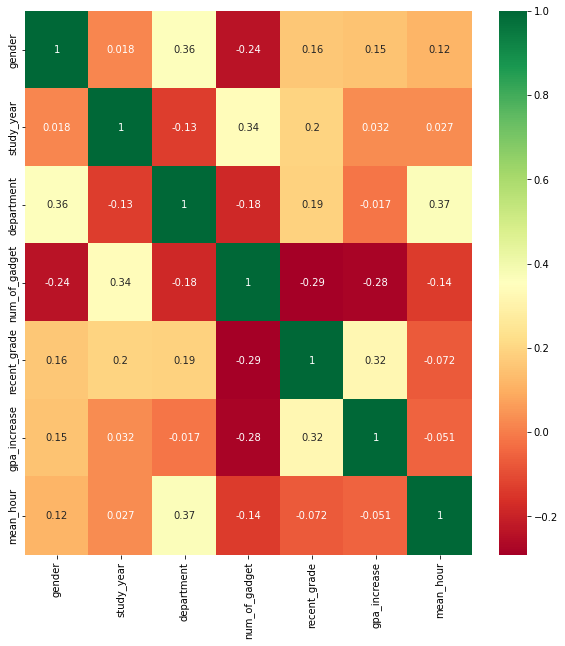

In [ ]:
# Feature correlation
data_cp_numeric = data_cp.convert_dtypes()
corrmat = data_cp_numeric.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))


#plot heat map
g=sns.heatmap(corrmat, annot=True,cmap="RdYlGn")

In [ ]:
# defining x and y
y = data_cp_numeric['gpa_increase'].astype('int')
x = data_cp_numeric.loc[:, data_cp_numeric.columns != 'gpa_increase']

# splitting test and train data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 1/3, shuffle=False)

In [ ]:
# Setup 1 (All features)
x_train_set1 = x_train
x_test_set1 = x_test

# Setup 2 (Chosen features)
x_train_set2 = x_train[['mean_hour', 'num_of_gadget']]
x_test_set2 = x_test[['mean_hour', 'num_of_gadget']]

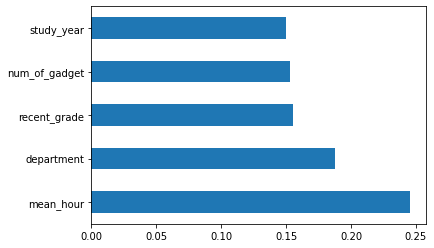

In [ ]:
# Setup 3 (Two most important features)
most_important_feat_model = ExtraTreesClassifier()
most_important_feat_model.fit(x, y)
feat_importances = pd.Series(most_important_feat_model.feature_importances_, index=x.columns)

# selecting the two most important
x_train_set3 = x_train[feat_importances.nlargest(2).keys()]
x_test_set3 = x_test[feat_importances.nlargest(2).keys()]

# plot graph
feat_importances.nlargest().plot(kind='barh')
plt.show()

In [ ]:
# Fitting the svm model
svm_model_set1 = SVC(gamma = 'auto')
svm_model_set2 = SVC(gamma = 'auto')
svm_model_set3 = SVC(gamma = 'auto')

svm_model_set1.fit(x_train_set1, y_train)
svm_model_set2.fit(x_train_set2, y_train)
svm_model_set3.fit(x_train_set3, y_train)

SVC(gamma='auto')

In [ ]:
# Fitting the KNN model
knn_model_set1 = KNeighborsClassifier()
knn_model_set2 = KNeighborsClassifier()
knn_model_set3 = KNeighborsClassifier()

knn_model_set1.fit(x_train_set1, y_train)
knn_model_set2.fit(x_train_set2, y_train)
knn_model_set3.fit(x_train_set3, y_train)


KNeighborsClassifier()

In [ ]:
# Accuracy performance test svm
set1_svm_acc = accuracy_score(y_test, svm_model_set1.predict(x_test_set1))
set2_svm_acc = accuracy_score(y_test, svm_model_set2.predict(x_test_set2))
set3_svm_acc = accuracy_score(y_test, svm_model_set3.predict(x_test_set3))

# Precision performance test svm
set1_svm_prec = precision_score(y_test, svm_model_set1.predict(x_test_set1))
set2_svm_prec = precision_score(y_test, svm_model_set2.predict(x_test_set2))
set3_svm_prec = precision_score(y_test, svm_model_set3.predict(x_test_set3))

# Recall performance test svm
set1_svm_rec = recall_score(y_test, svm_model_set1.predict(x_test_set1))
set2_svm_rec = recall_score(y_test, svm_model_set2.predict(x_test_set2))
set3_svm_rec = recall_score(y_test, svm_model_set3.predict(x_test_set3))

# Confusion matrix performance test svm
set1_svm_conf = pd.DataFrame(confusion_matrix(y_test, svm_model_set1.predict(x_test_set1)))
set2_svm_conf = pd.DataFrame(confusion_matrix(y_test, svm_model_set2.predict(x_test_set2)))
set3_svm_conf = pd.DataFrame(confusion_matrix(y_test, svm_model_set3.predict(x_test_set3)))

In [ ]:
# set 1 confusion matrix
set1_svm_conf

,0,1
0,5,3
1,1,1


In [ ]:
# set 2 confusion matrix
set2_svm_conf

,0,1
0,6,2
1,1,1


In [ ]:
# set 3 confusion matrix
set3_svm_conf

,0,1
0,6,2
1,1,1


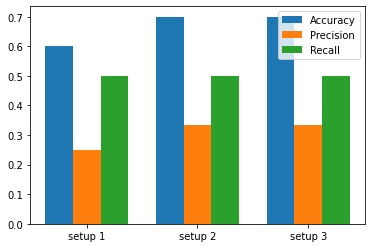

In [ ]:
# plot results svm
setup_names = ['setup 1', 'setup 2', 'setup 3']
score_names = ('Accuracy', 'Precision', 'Recall')
svm_acc_scores = [set1_svm_acc, set2_svm_acc, set3_svm_acc]
svm_prec_scores = [set1_svm_prec, set2_svm_prec, set3_svm_prec]
svm_rec_scores = [set1_svm_rec, set2_svm_rec, set3_svm_rec]


svm_graph_x = np.arange(len(setup_names))
svm_graph_width = 0.25

svm_bar1 = plt.bar(svm_graph_x, svm_acc_scores, svm_graph_width)
svm_bar2 = plt.bar(svm_graph_x+svm_graph_width, svm_prec_scores, svm_graph_width)
svm_bar3 = plt.bar(svm_graph_x+svm_graph_width*2, svm_rec_scores, svm_graph_width)

plt.xticks(svm_graph_x+svm_graph_width, setup_names)
plt.legend( (svm_bar1, svm_bar2, svm_bar3), (score_names ))
plt.show()

In [ ]:
# Accuracy performance test knn
set1_knn_acc = accuracy_score(y_test, knn_model_set1.predict(x_test_set1))
set2_knn_acc = accuracy_score(y_test, knn_model_set2.predict(x_test_set2))
set3_knn_acc = accuracy_score(y_test, knn_model_set3.predict(x_test_set3))

# Precision performance test knn
set1_knn_prec = precision_score(y_test, knn_model_set1.predict(x_test_set1))
set2_knn_prec = precision_score(y_test, knn_model_set2.predict(x_test_set2))
set3_knn_prec = precision_score(y_test, knn_model_set3.predict(x_test_set3))

# Recall performance test knn
set1_knn_rec = recall_score(y_test, knn_model_set1.predict(x_test_set1))
set2_knn_rec = recall_score(y_test, knn_model_set2.predict(x_test_set2))
set3_knn_rec = recall_score(y_test, knn_model_set3.predict(x_test_set3))

# Confusion matrix performance test knn
set1_knn_conf = pd.DataFrame(confusion_matrix(y_test, knn_model_set1.predict(x_test_set1)))
set2_knn_conf = pd.DataFrame(confusion_matrix(y_test, knn_model_set2.predict(x_test_set2)))
set3_knn_conf = pd.DataFrame(confusion_matrix(y_test, knn_model_set3.predict(x_test_set3)))

In [ ]:
# set 1 confusion matrix
set1_knn_conf

,0,1
0,7,1
1,0,2


In [ ]:
# set 1 confusion matrix
set2_knn_conf

,0,1
0,6,2
1,1,1


In [ ]:
# set 1 confusion matrix
set3_knn_conf

,0,1
0,4,4
1,1,1


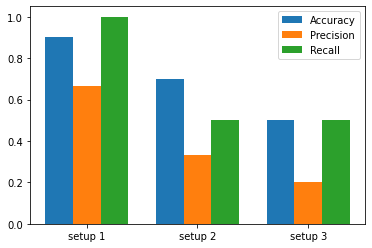

In [ ]:
# plot results knn
knn_acc_scores = [set1_knn_acc, set2_knn_acc, set3_knn_acc]
knn_prec_scores = [set1_knn_prec, set2_knn_prec, set3_knn_prec]
knn_rec_scores = [set1_knn_rec, set2_knn_rec, set3_knn_rec]


knn_graph_x = np.arange(len(setup_names))
knn_graph_width = 0.25

knn_bar1 = plt.bar(knn_graph_x, knn_acc_scores, knn_graph_width)
knn_bar2 = plt.bar(knn_graph_x+knn_graph_width, knn_prec_scores, knn_graph_width)
knn_bar3 = plt.bar(knn_graph_x+knn_graph_width*2, knn_rec_scores, knn_graph_width)

plt.xticks(knn_graph_x+knn_graph_width, setup_names)
plt.legend( (knn_bar1, knn_bar2, knn_bar3), (score_names ))
plt.show()